In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
credit=pd.read_csv("CC_GENERAL.csv")

In [3]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
#check for missing values
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [6]:
#Missing Value Treatment:
credit.CREDIT_LIMIT.fillna(credit.CREDIT_LIMIT.median(),inplace=True)
credit.MINIMUM_PAYMENTS.fillna(credit.MINIMUM_PAYMENTS.median(),inplace=True)

In [7]:
credit['Avg Monthly_Purchase']=credit['PURCHASES']/credit['TENURE']

In [8]:
credit['Monthly Cash Advance']=credit['CASH_ADVANCE']/credit['TENURE']

In [9]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


In [10]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [11]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [12]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [13]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

In [14]:
def purchase(credit):
    
   
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [15]:
credit['Purchase Type']=credit.apply(purchase,axis=1)

In [16]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Avg Monthly_Purchase,Monthly Cash Advance,Purchase Type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,one_off
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off


In [17]:
credit['Purchase Type'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: Purchase Type, dtype: int64

In [18]:
credit['Limit Usage']=credit.apply(lambda x:x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [19]:
#Limit Usage shows credit card utilization.Lower value means good credit score.
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Avg Monthly_Purchase,Monthly Cash Advance,Purchase Type,Limit Usage
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment,0.040901
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off,0.332687
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,one_off,0.222223
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off,0.681429


In [20]:
credit['MINIMUM_PAYMENTS'].describe()

count     8950.000000
mean       844.906767
std       2332.792322
min          0.019163
25%        170.857654
50%        312.343947
75%        788.713501
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [21]:
credit['payment_minpay']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [22]:
# log tranformation
cr_log=credit.drop(['CUST_ID','Purchase Type'],axis=1).applymap(lambda x: np.log(x+1))

In [23]:
cr_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Avg Monthly_Purchase,Monthly Cash Advance,Limit Usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [24]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

In [25]:
cr_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Avg Monthly_Purchase',
       'Monthly Cash Advance', 'Limit Usage', 'payment_minpay'],
      dtype='object')

In [26]:
cr_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Avg Monthly_Purchase', 'Monthly Cash Advance', 'Limit Usage',
       'payment_minpay'],
      dtype='object')

### Insights from new KPI's

In [27]:
# Average payment_minpayment ratio for each purchse type.
x=credit.groupby('Purchase Type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

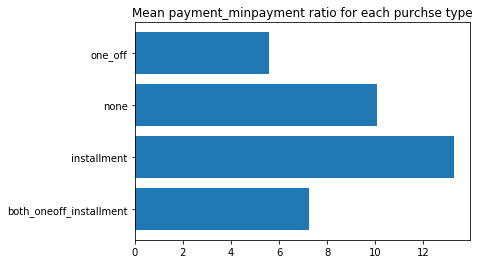

In [28]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)),width=x.values)
ax.set(yticks= np.arange(len(x)),yticklabels=x.index)
plt.title('Mean payment_minpayment ratio for each purchse type')

In [29]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Avg Monthly_Purchase,Monthly Cash Advance,Limit Usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,...,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,86.175173,88.977984,0.388884,9.059164
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,...,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,180.508787,193.136115,0.389722,118.180526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.913275
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,0.302720,2.032717
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,0.717571,6.052729
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


In [30]:
# 1. customers with installment purchases are paying dues

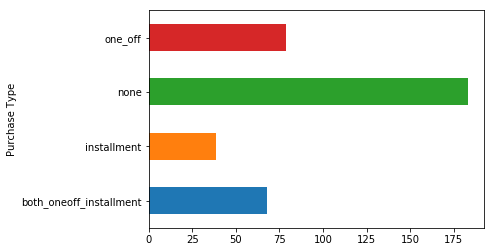

In [31]:
credit.groupby("Purchase Type").apply(lambda x:np.mean(x['Monthly Cash Advance'])).plot.barh()

In [32]:
# 2.Customers who don't do either one-off or installment purchases take more cash on advance

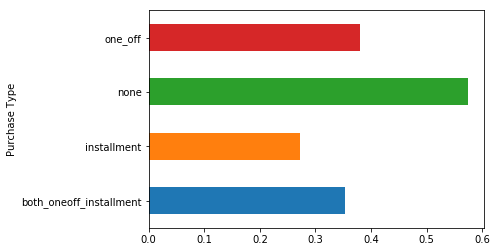

In [33]:
credit.groupby('Purchase Type').apply(lambda x:np.mean(x['Limit Usage'])).plot.barh()

In [34]:
# 3. Customers with installment purchases have good credit score

In [35]:
cr_pre['Purchase Type']=credit.loc[:,'Purchase Type']
pd.get_dummies(cr_pre['Purchase Type'])

,both_oneoff_installment,installment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,1,0,0
6,1,0,0,0
7,0,1,0,0
8,1,0,0,0
9,0,0,0,1


In [36]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['Purchase Type'])],axis=1)

In [37]:
l=['Purchase Type']
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().any()


BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Avg Monthly_Purchase                False
Monthly Cash Advance                False
Limit Usage                         False
payment_minpay                      False
both_oneoff_installment             False
installment                         False
none                                False
one_off                             False
dtype: bool

In [38]:
cr_dummy.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Avg Monthly_Purchase,Monthly Cash Advance,Limit Usage,payment_minpay,both_oneoff_installment,installment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,0,0,0,1


In [39]:
cr_dummy.shape

(8950, 17)

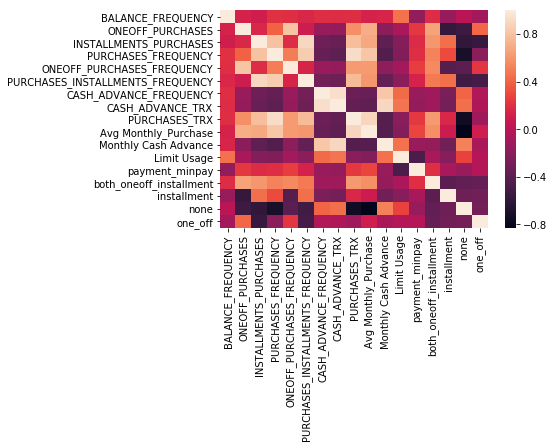

In [40]:
sns.heatmap(cr_dummy.corr())

In [41]:
#Standardization of Data

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc=StandardScaler() #standardscaler object created

In [108]:
cr_scaled=sc.fit_transform(cr_dummy)

In [45]:
cr_scaled.shape

(8950, 17)

In [46]:
pd.DataFrame(cr_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.148757,-0.987090,0.394480,-0.746901,-0.732480,-0.674253,-0.724360,-0.810069,-0.579510,-0.429030,-0.890667,-1.022796,-0.492437,-0.670193,1.720516,-0.543690,-0.514625
1,0.179616,-0.987090,-1.087454,-1.302799,-0.732480,-0.958256,0.699592,0.784603,-1.379210,-1.523373,1.697282,0.322182,0.230261,-0.670193,-0.581221,1.839282,-0.514625
2,0.492710,1.062022,-1.087454,1.196820,2.466762,-0.958256,-0.724360,-0.810069,0.487865,0.564294,-0.890667,-0.035495,-0.711225,-0.670193,-0.581221,-0.543690,1.943162
3,-0.857867,1.265778,-1.087454,-1.014151,-0.363042,-0.958256,-0.213583,-0.123281,-0.874655,0.891164,0.302372,-0.381199,-1.444107,-0.670193,-0.581221,-0.543690,1.943162
4,0.492710,-0.114307,-1.087454,-1.014151,-0.363042,-0.958256,-0.724360,-0.810069,-0.874655,-1.100298,-0.890667,0.893219,-0.032167,-0.670193,-0.581221,-0.543690,1.943162


### Applying PCA

In [47]:
from sklearn.decomposition import PCA
pc=PCA()
cr_pca=pc.fit(cr_scaled)

In [48]:
cr_pca.explained_variance_ratio_

array([4.02057869e-01, 1.80586110e-01, 1.47293952e-01, 8.16063453e-02,
       6.55113033e-02, 4.15936648e-02, 2.24432813e-02, 2.05188798e-02,
       1.23673028e-02, 9.61095026e-03, 6.13515227e-03, 3.03019018e-03,
       2.63575533e-03, 2.57093358e-03, 1.67435750e-03, 3.63952683e-04,
       1.02417322e-31])

In [49]:
var_ratio={}
for n in range(1,18):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [50]:
var_ratio

{1: 0.4020578691094781,
 2: 0.5826439793960287,
 3: 0.7299379309512698,
 4: 0.8115442762351259,
 5: 0.8770555795291434,
 6: 0.9186492443512615,
 7: 0.9410925256030136,
 8: 0.9616114053683061,
 9: 0.9739787081990648,
 10: 0.9835896584630703,
 11: 0.9897248107341959,
 12: 0.9927550009135228,
 13: 0.9953907562385423,
 14: 0.9979616898169592,
 15: 0.9996360473172953,
 16: 0.9999999999999998,
 17: 0.9999999999999998}

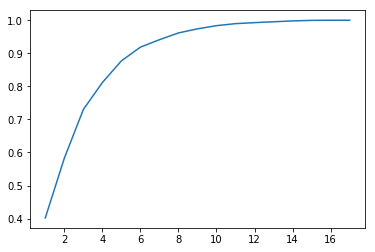

In [51]:
pd.Series(var_ratio).plot()

In [52]:
pc=PCA(n_components=6)
p=pc.fit(cr_scaled)

In [53]:
cr_scaled.shape

(8950, 17)

In [54]:
sum(p.explained_variance_ratio_)

0.9186492443512626

In [55]:
pc_final=PCA(n_components=6).fit(cr_scaled)
reduced_cr=pc_final.fit_transform(cr_scaled)

In [56]:
pd.DataFrame(cr_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.148757,-0.987090,0.394480,-0.746901,-0.732480,-0.674253,-0.724360,-0.810069,-0.579510,-0.429030,-0.890667,-1.022796,-0.492437,-0.670193,1.720516,-0.543690,-0.514625
1,0.179616,-0.987090,-1.087454,-1.302799,-0.732480,-0.958256,0.699592,0.784603,-1.379210,-1.523373,1.697282,0.322182,0.230261,-0.670193,-0.581221,1.839282,-0.514625
2,0.492710,1.062022,-1.087454,1.196820,2.466762,-0.958256,-0.724360,-0.810069,0.487865,0.564294,-0.890667,-0.035495,-0.711225,-0.670193,-0.581221,-0.543690,1.943162
3,-0.857867,1.265778,-1.087454,-1.014151,-0.363042,-0.958256,-0.213583,-0.123281,-0.874655,0.891164,0.302372,-0.381199,-1.444107,-0.670193,-0.581221,-0.543690,1.943162
4,0.492710,-0.114307,-1.087454,-1.014151,-0.363042,-0.958256,-0.724360,-0.810069,-0.874655,-1.100298,-0.890667,0.893219,-0.032167,-0.670193,-0.581221,-0.543690,1.943162


In [57]:
pd.DataFrame(reduced_cr).head()

,0,1,2,3,4,5
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214


In [58]:
pd.DataFrame(reduced_cr).shape

(8950, 6)

In [59]:
col_list=cr_dummy.columns

In [60]:
pc_final.components_ #Get the eigenvectors

array([[ 0.0297071 ,  0.21410721,  0.31205063,  0.34582323,  0.21470195,
         0.29545081, -0.21433583, -0.22939348,  0.35550341,  0.34599214,
        -0.24386117, -0.1463019 ,  0.11963162,  0.24139215,  0.08220908,
        -0.31028278, -0.04213752],
       [ 0.24007222,  0.40607818, -0.09840366,  0.01581341,  0.36220781,
        -0.11200248,  0.28607383,  0.29155561,  0.10662477,  0.14163539,
         0.26431762,  0.23570977,  0.02132802,  0.27367598, -0.44337547,
        -0.00521354,  0.16773728],
       [-0.26313956,  0.23916545, -0.31562528, -0.16284334,  0.16322234,
        -0.33002935, -0.27858553, -0.28508932, -0.10274279,  0.02398613,
        -0.25742721, -0.25127813,  0.13635689, -0.13193476, -0.20868331,
        -0.09691138,  0.47274947],
       [-0.35354869,  0.00151952,  0.0879826 , -0.07461667,  0.03630313,
         0.02350202,  0.09635256,  0.10348406, -0.0542963 , -0.0793729 ,
         0.13529182, -0.43168165,  0.591561  ,  0.25470958, -0.19082912,
         0.24510377

In [61]:
pd.DataFrame(pc_final.components_.T,columns=['PC_'+str(i) for i in range(6)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681,-0.693816
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197,0.129094
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181,0.115223
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948,-0.081879
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279,-0.097299
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871,0.006731
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132,0.066589
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753,0.082307
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971,-0.009402
Avg Monthly_Purchase,0.345992,0.141635,0.023986,-0.079373,0.194147,0.015878


### Clustering

In [62]:
from sklearn.cluster import KMeans

In [63]:
km_4=KMeans(n_clusters=4,random_state=123)

In [64]:
km_4.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [65]:
km_4.labels_

array([2, 1, 0, ..., 2, 1, 0])

In [66]:
pd.Series(km_4.labels_).value_counts()

3    2769
2    2224
1    2088
0    1869
dtype: int64

In [67]:
cluster_range=range(1,21)
cluster_error=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(reduced_cr)
    cluster_error.append(clusters.inertia_)

In [68]:
cluster_error

[139772.48252804455,
 93307.58908670848,
 70745.19339969527,
 49446.06648510146,
 42548.47842554466,
 37712.97106440005,
 34290.771536969405,
 31285.586485368276,
 28601.696648010584,
 26302.82970641755,
 24020.161722348414,
 22363.845109174363,
 21006.586042502302,
 19857.372436190555,
 18729.171021849368,
 18220.418199802512,
 17398.791390370112,
 16893.05583777436,
 16353.419399050346,
 15850.390941210939]

In [69]:
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'clusters_error':cluster_error})

In [70]:
clusters_df

,num_clusters,clusters_error
0,1,139772.482528
1,2,93307.589087
2,3,70745.193400
3,4,49446.066485
4,5,42548.478426
5,6,37712.971064
6,7,34290.771537
7,8,31285.586485
8,9,28601.696648
9,10,26302.829706


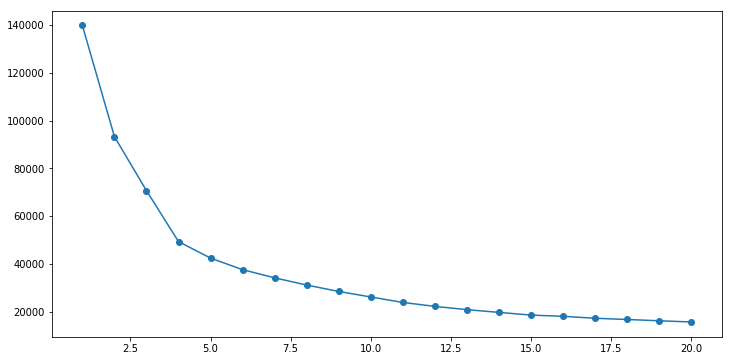

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.clusters_error,marker="o")

In [72]:
from sklearn import metrics
k_range=range(2,7)
score=[]
for k in k_range:
    km=KMeans(n_clusters=k,random_state=1)
    km.fit(reduced_cr)
    score.append(metrics.silhouette_score(reduced_cr,km.labels_))

In [73]:
score

[0.33194521792342624,
 0.3540311511892247,
 0.4370857743965947,
 0.43121145209717754,
 0.42281449146537453]

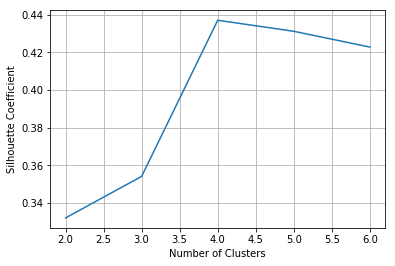

In [74]:
#Plotting of results
plt.plot(k_range,score)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid()

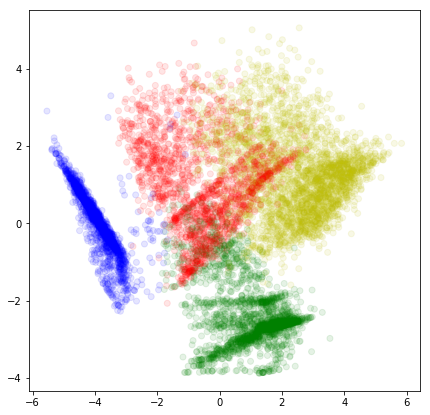

In [75]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.1)

In [76]:
km_4.cluster_centers_

array([[-0.55063641,  0.9972586 ,  2.30678219, -0.91171204,  0.7806236 ,
        -0.08114314],
       [-3.86531652, -0.02302861, -0.47744381,  0.60170709, -0.64748324,
        -0.2211967 ],
       [ 1.01861233, -2.37631366, -0.87796138, -0.4541    ,  0.65965448,
        -0.10841258],
       [ 2.46822915,  1.25284543, -0.49183356,  0.52637913, -0.56847673,
         0.30864024]])

In [77]:
cr_dummy.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Avg Monthly_Purchase',
       'Monthly Cash Advance', 'Limit Usage', 'payment_minpay',
       'both_oneoff_installment', 'installment', 'none', 'one_off'],
      dtype='object')

In [78]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(6)])

In [79]:
df_pair_plot['Cluster']=km_4.labels_

In [80]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755,2
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463,1
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932,0
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986,0
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214,0


C:\Users\Ankit Sharma\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


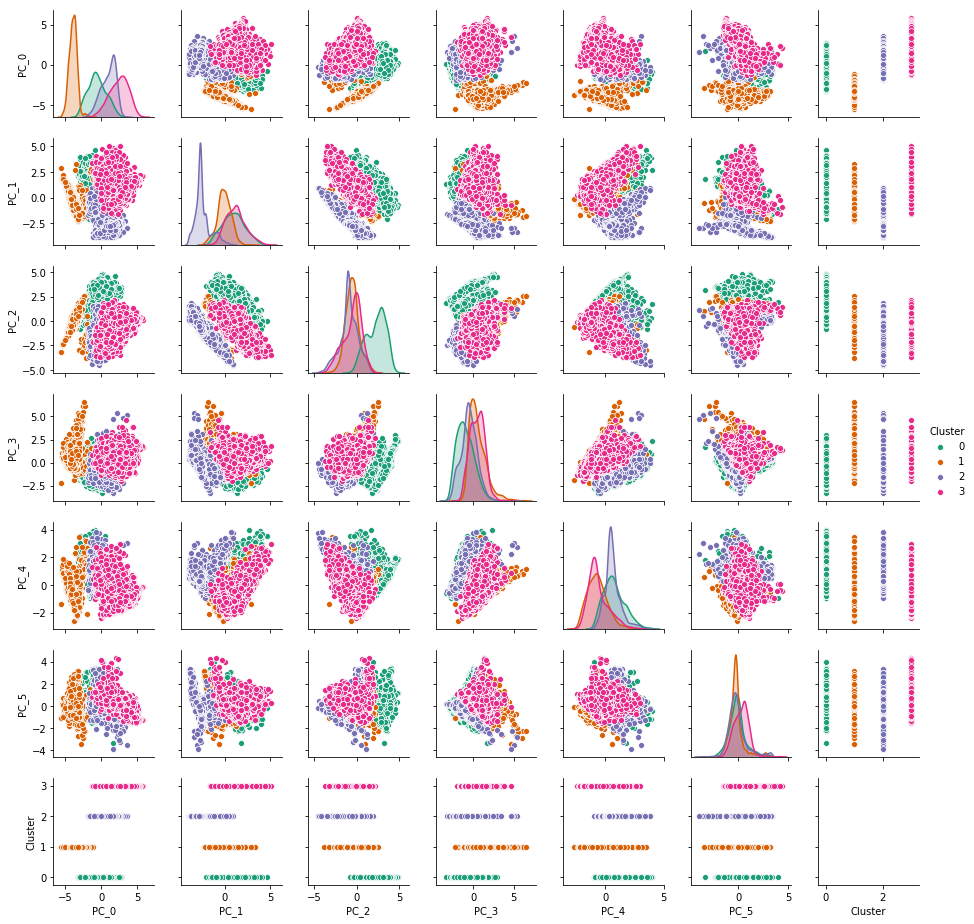

In [81]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [82]:
cr_dummy.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Avg Monthly_Purchase',
       'Monthly Cash Advance', 'Limit Usage', 'payment_minpay',
       'both_oneoff_installment', 'installment', 'none', 'one_off'],
      dtype='object')

In [83]:
#Key Performance Variable Selection
col_kpi=['PURCHASES_TRX', 'Avg Monthly_Purchase','Monthly Cash Advance', 'Limit Usage','CASH_ADVANCE_TRX','payment_minpay',
       'both_oneoff_installment', 'installment', 'none', 'one_off', 'CREDIT_LIMIT']

In [84]:
cr_pre=pd.concat([cr_dummy,credit['CREDIT_LIMIT']],axis=1)[col_kpi]

In [85]:
cr_pre.describe()

,PURCHASES_TRX,Avg Monthly_Purchase,Monthly Cash Advance,Limit Usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,installment,none,one_off,CREDIT_LIMIT
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1.894731,3.050877,2.163970,0.296081,0.817570,1.357600,0.309944,0.252514,0.228156,0.209385,4494.282473
std,1.373856,2.002823,2.429741,0.250303,1.009316,0.940149,0.462496,0.434479,0.419667,0.406893,3638.646702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,0.693147,1.481458,0.000000,0.040656,0.000000,0.648817,0.000000,0.000000,0.000000,0.000000,1600.000000
50%,2.079442,3.494587,0.000000,0.264455,0.000000,1.109459,0.000000,0.000000,0.000000,0.000000,3000.000000
75%,2.890372,4.587295,4.606022,0.540911,1.609438,1.953415,1.000000,1.000000,0.000000,0.000000,6500.000000
max,5.883322,8.315721,8.276166,2.827902,4.820282,8.830767,1.000000,1.000000,1.000000,1.000000,30000.000000


In [86]:
#Concatenating labels got from KMeans with the data
cluster_df_4=pd.concat([cr_pre[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [87]:
cluster_df_4.head()

,PURCHASES_TRX,Avg Monthly_Purchase,Monthly Cash Advance,Limit Usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,installment,none,one_off,CREDIT_LIMIT,Cluster_4
0,1.098612,2.191654,0.000000,0.040086,0.000000,0.894662,0,1,0,0,1000.0,2
1,0.000000,0.000000,6.287695,0.376719,1.609438,1.574068,0,0,1,0,7000.0,1
2,2.564949,4.180994,0.000000,0.287197,0.000000,0.688979,0,0,0,1,7500.0,0
3,0.693147,4.835620,2.898616,0.200671,0.693147,0.000000,0,0,0,1,7500.0,0
4,0.693147,0.847298,0.000000,0.519644,0.000000,1.327360,0,0,0,1,1200.0,0


In [88]:
cluster_4=cluster_df_4.groupby('Cluster_4').apply(lambda x:x[col_kpi].mean()).T

In [89]:
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,1.616617,0.023045,2.297815,3.170070
Avg Monthly_Purchase,3.474472,0.037554,3.384036,4.769610
Monthly Cash Advance,1.901905,4.490651,0.856574,1.636466
Limit Usage,0.290933,0.429141,0.199084,0.277126
CASH_ADVANCE_TRX,0.734439,1.670713,0.296037,0.649242
payment_minpay,1.320351,1.137075,1.253219,1.632868
both_oneoff_installment,0.000535,0.001916,0.000000,1.000000
installment,0.000000,0.017241,1.000000,0.000000
none,0.000000,0.977969,0.000000,0.000000
one_off,0.999465,0.002874,0.000000,0.000000


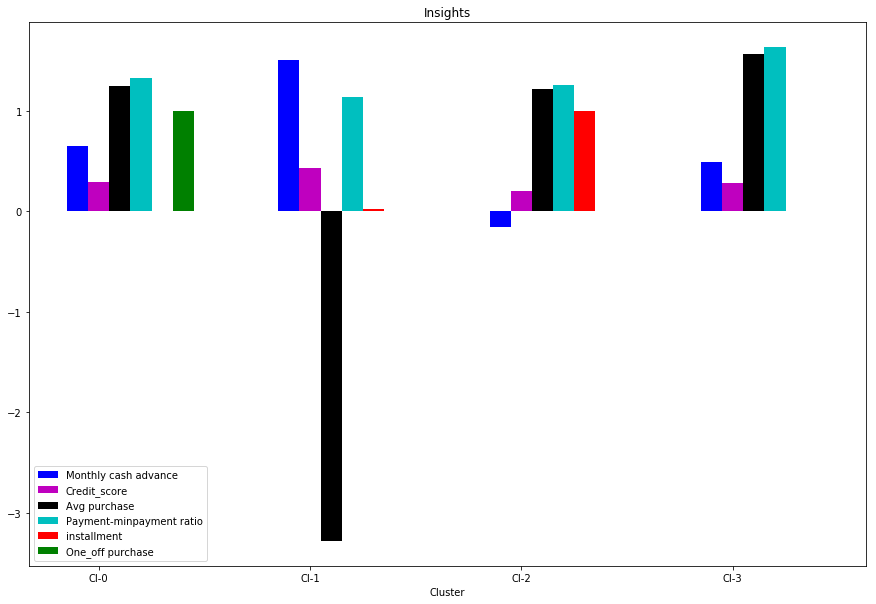

In [90]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly Cash Advance',:].values)
credit_score=(cluster_4.loc['Limit Usage',:].values)
purchase= np.log(cluster_4.loc['Avg Monthly_Purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

In [91]:
# Insights::
# Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off purchases, have comparatively good credit score. * This group is about 31% of the total customer base *
# cluster 1 is taking maximum advance_cash and is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. * This group is about 23% of the total customer base *
# Cluster 0 customers are doing maximum One_Off transactions and least payment ratio. * This group is about 21% of the total customer base *
# Cluster 3 customers have maximum credit score and are paying dues and are doing maximum installment purchases. * This group is about 25% of the total customer base *


In [92]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print(s,'\n')
per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print("Cluster -4 ",'\n')
print(pd.concat([pd.Series(s.values,name='Size'),per],axis=1),'\n')



Cluster_4   
0          0    1869
1          1    2088
2          2    2224
3          3    2769
Name: Cluster_4, dtype: int64 

Cluster -4  

   Size  Percentage
0  1869   20.882682
1  2088   23.329609
2  2224   24.849162
3  2769   30.938547 



### Finding behaviour with 5 Clusters:

In [93]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)
km_5.labels_

array([4, 2, 0, ..., 4, 2, 0])

In [94]:
pd.Series(km_5.labels_).value_counts()

4    2149
2    2081
1    1977
0    1862
3     881
dtype: int64

Text(0, 0.5, 'PC_1')

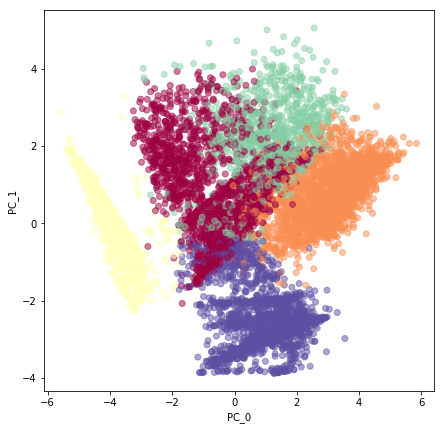

In [95]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [96]:
cluster_df_5=pd.concat([cr_pre[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [97]:
cluster_df_5.groupby('Cluster_5').apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,1.613106,3.213108,0.018188,3.005094,2.287847
Avg Monthly_Purchase,3.469302,4.843614,0.027576,4.499184,3.372971
Monthly Cash Advance,1.878412,0.346477,4.484717,4.964353,0.688066
Limit Usage,0.289588,0.208188,0.429089,0.456163,0.188139
CASH_ADVANCE_TRX,0.719206,0.092626,1.663987,2.120908,0.215770
payment_minpay,1.317659,1.809684,1.137818,1.187867,1.258716
both_oneoff_installment,0.002148,1.000000,0.000000,0.900114,0.000000
installment,0.000000,0.000000,0.015858,0.088536,1.000000
none,0.000000,0.000000,0.981259,0.000000,0.000000
one_off,0.997852,0.000000,0.002883,0.011351,0.000000


In [98]:
# With 5 clusters :
# we have a group of customers (cluster 2) having highest avergae purchases but there is Cluster 4 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same.
# Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side
# So we don't have quite distinguishable characteristics with 5 clusters

In [99]:
s=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print(s,'\n')
per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print("Cluster -5 ",'\n')
print(pd.concat([pd.Series(s.values,name='Size'),per],axis=1),'\n')


Cluster_5   
0          0    1862
1          1    1977
2          2    2081
3          3     881
4          4    2149
Name: Cluster_5, dtype: int64 

Cluster -5  

   Size  Percentage
0  1862   20.804469
1  1977   22.089385
2  2081   23.251397
3   881    9.843575
4  2149   24.011173 



### Finding behavior with 6 clusters

In [100]:
km_6=KMeans(n_clusters=6,random_state=123)
km_6=km_6.fit(reduced_cr)
km_6.labels_

array([5, 3, 2, ..., 5, 3, 2])

In [101]:
pd.Series(km_6.labels_).value_counts()

3    2011
0    1923
5    1905
2    1587
4     864
1     660
dtype: int64

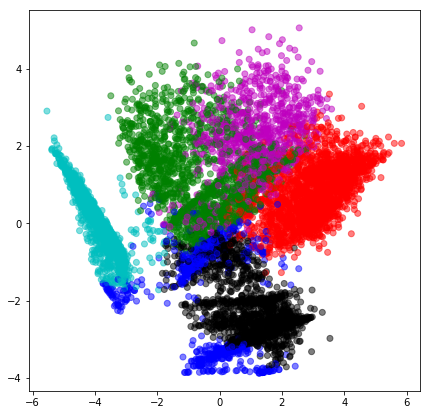

In [102]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)


In [103]:
six_ccluster_df_6=pd.concat([cr_pre[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [104]:
six_cluster=six_ccluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,3.243909,1.140624,1.726480,0.018333,3.017890,2.405638
Avg Monthly_Purchase,4.878932,2.394383,3.590443,0.028008,4.510250,3.512680
Monthly Cash Advance,0.338303,0.529933,2.196829,4.521029,4.916082,0.809223
Limit Usage,0.211635,0.013985,0.339693,0.443306,0.454404,0.215504
CASH_ADVANCE_TRX,0.088916,0.140304,0.852676,1.692288,2.088131,0.258862
payment_minpay,1.825398,1.475785,1.266881,1.110847,1.183573,1.259424
both_oneoff_installment,1.000000,0.071212,0.000000,0.000000,0.930556,0.000000
installment,0.000000,0.396970,0.000000,0.016410,0.069444,1.000000
none,0.000000,0.103030,0.000000,0.981601,0.000000,0.000000
one_off,0.000000,0.428788,1.000000,0.001989,0.000000,0.000000


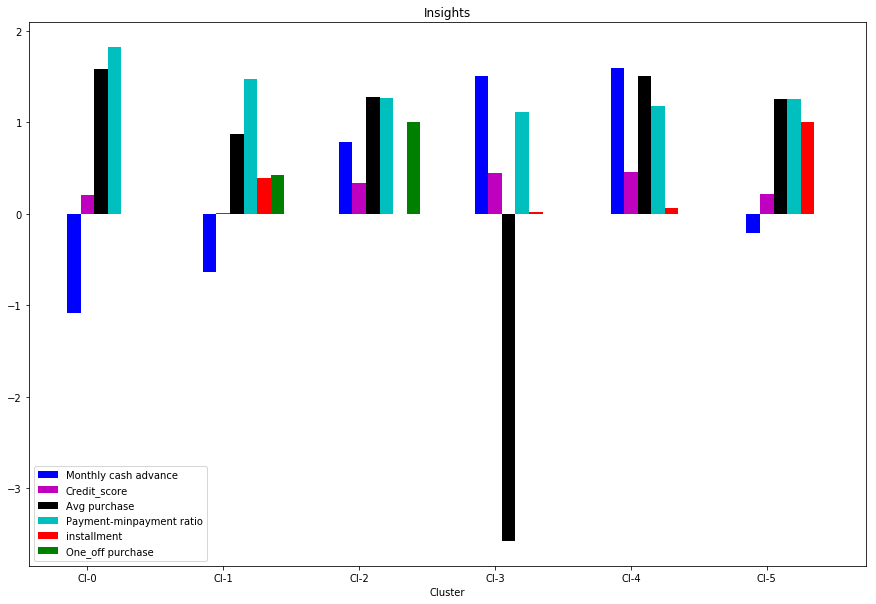

In [105]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly Cash Advance',:].values)
credit_score=(six_cluster.loc['Limit Usage',:].values)
purchase= np.log(six_cluster.loc['Avg Monthly_Purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['installment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [106]:
cash_advance=np.log(six_cluster.loc['Monthly Cash Advance',:].values)
credit_score=(six_cluster.loc['Limit Usage',:].values)
cash_advance
credit_score

array([0.21163499, 0.01398462, 0.33969328, 0.44330552, 0.45440357,
       0.21550397])

In [107]:
# Insights with 6 clusters
# Here also groups are overlapping .
# Cl-0 and Cl-2 behaving same